# World deaths by risk factor

### Data:
- https://www.kaggle.com/datasets/varpit94/worldwide-deaths-by-risk-factors
- https://github.com/dbouquin/IS_608/blob/master/NanosatDB_munging/Countries-Continents.csv
- https://github.com/datasets/population/blob/master/data/population.csv

### Hypotheses for the period 2010-2010:
1. What is the trend in world deaths in terms of unsafe water sauce?
2. Which 2 continents have the highest number of deaths in terms of child wasting and how this number changed over 5 year periods? Which five countries have had the greatest reductions in deaths per million inhabitants in top 1 continent? Show the difference between the highest and the lowest deaths per million inhabitants for the country.
3. What is the trend in Baltic countries deaths in terms of alcohol use and drug use after 2000?
4. How are the continents divided in terms of deaths from smoking (average death rates in period 1990-2017)?
5. Which countries are in the top 5 in terms of deaths from smoking per million inhabitants in each continent (average death rates in period 1990-2017)?
6. Which Asian countries (top 10) have the most deaths per million inhabitants in term of air pollution in 2017?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as cnt

In [2]:
d = pd.read_csv('number-of-deaths-by-risk-factor.csv')
d.head()

,Entity,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,...,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
0,Afghanistan,1990,7554.049543,5887.747628,5412.314513,22388.49723,3221.138842,156.097553,22778.84925,10408.43885,...,28183.98335,6393.667372,726.431294,9344.131952,374.844056,26598.00673,4383.83,2737.197934,11381.37735,7299.867330
1,Afghanistan,1991,7359.676749,5732.770160,5287.891103,22128.75821,3150.559597,151.539851,22292.69111,10271.97643,...,28435.39751,6429.253320,739.245799,9330.182378,379.854237,26379.53222,4426.36,2741.184956,11487.83239,7386.764303
2,Afghanistan,1992,7650.437822,5954.804987,5506.657363,22873.76879,3331.349048,156.609194,23102.19794,10618.87978,...,29173.61120,6561.054957,873.485341,9769.844533,388.130434,27263.12791,4568.91,2798.560245,11866.23557,7640.628526
3,Afghanistan,1993,10270.731380,7986.736613,7104.620351,25599.75628,4477.006100,206.834451,27902.66996,12260.09384,...,30074.76091,6731.972560,1040.047422,11433.769490,405.577931,30495.56150,5080.29,2853.301679,12335.96168,7968.311853
4,Afghanistan,1994,11409.177110,8863.010065,8051.515953,28013.16720,5102.622054,233.930571,32929.00593,14197.94796,...,30809.49117,6889.328118,1101.764645,12936.955860,415.349195,33323.16140,5499.23,2880.025765,12672.95019,8244.368430


In [3]:
p = pd.read_csv('population.csv')
p.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92197753
1,Arab World,ARB,1961,94724510
2,Arab World,ARB,1962,97334442
3,Arab World,ARB,1963,100034179
4,Arab World,ARB,1964,102832760


1. What is the trend in world deaths in terms of unsafe water sauce?

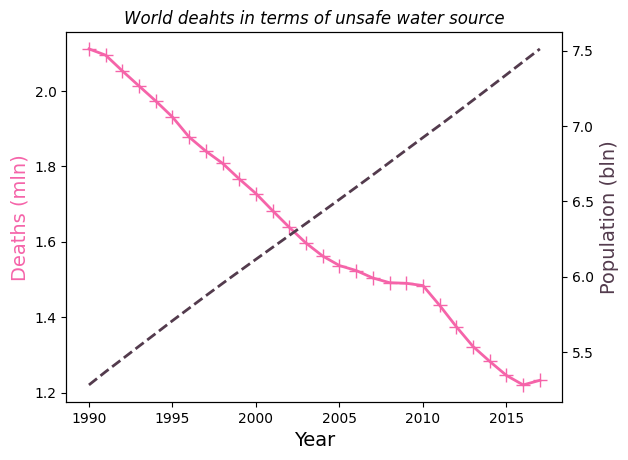

In [4]:
y_usw = d[d['Entity'] == 'World']['Year']
d_uws = d[d['Entity'] == 'World']['Unsafe water source']
pop = p[(p['Country Name'] == 'World') & (p['Year'] >= 1990) & (p['Year'] <= 2017)]['Value']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(y_usw, d_uws/10**6, lw=2, color='#F564A9', marker='+', ms=10)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Deaths (mln)', c='#F564A9', fontsize=14)
ax1.set_title('World deahts in terms of unsafe water source', style='italic')

ax2.plot(y_usw, pop/10**9, ls='--', lw=2, color='#533B4D')
ax2.set_ylabel('Population (bln)', c='#533B4D', fontsize=14)
plt.show()


In [5]:
DB = cnt.connect(
    host = 'localhost',
    port = 3307,
    user = 'root',
    password = 'root'
)

c = DB.cursor()
c.execute('USE deaths')

2. Which 2 continents have the highest number of deaths caused by child wasting and how this is changing over 5 year periods?

In [6]:
sql = '''
SELECT continent, SUM(`Child wasting`)/1000000 AS `Deaths (mln)`
FROM deaths d
JOIN continents c
	ON d.entity = c.country
WHERE Year BETWEEN {s} AND {e}
GROUP BY continent
ORDER BY continent ASC
LIMIT 2;
'''

sy0 = 1990 # starting year
ey0 = 2017 # ending year
every = 5
interval = int((ey0 - sy0)/every)

labels = []
lab = []
cw_con1 = []
cw_con2 = []
for i in range(1,interval+1):
    sy = sy0+(i-1)*every
    ey = sy0+i*every
    labels.append(str(sy)+'-'+str(ey))

    c.execute(sql.format(s=sy, e=ey))
    ans = c.fetchall()
    print(ans)
    if i == 1:
        lab.append(ans[0][0])
        lab.append(ans[1][0])
    cw_con1.append(ans[0][1])
    cw_con2.append(ans[1][1])

[('Africa', 7.156947648201936), ('Asia', 10.528796127346356)]
[('Africa', 6.837156521440941), ('Asia', 8.652842159140235)]
[('Africa', 6.014304055349139), ('Asia', 6.338896159430724)]
[('Africa', 5.162802746980959), ('Asia', 4.5314703615516745)]
[('Africa', 4.286111494778304), ('Asia', 3.345085643028419)]


Which top 5 countries had the highest deaths per mln people reduce in top 1 continent? Show the difference between the highest and the lowest deaths per mln people.

In [7]:
sql = '''
SELECT p.country, MAX(`Child wasting`/value*1000000)-MIN(`Child wasting`/value*1000000) AS `Death rate change`
FROM population p
JOIN deaths d
	ON d.entity = p. country AND d.year = p. year
JOIN continents c
	USING (country)
WHERE continent = '{}'
GROUP BY country
ORDER BY `Death rate change` DESC
LIMIT 5;
'''

country = []
diff = []
c.execute(sql.format(lab[1]))
ans = c.fetchall()

for el in ans:
	country.append(el[0])
	diff.append(el[1])

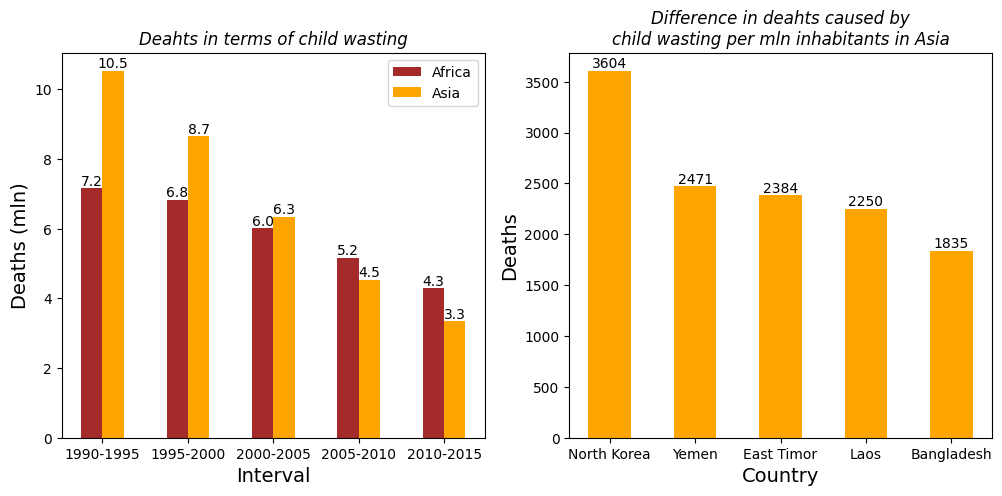

In [8]:
x = np.arange(1,interval+1)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

w = 0.25
A = ax1.bar(x-w/2, cw_con1, width=w, color='brown', label=lab[0])
B = ax1.bar(x+w/2, cw_con2, width=w, color='orange', label=lab[1])
ax1.set_xlabel('Interval', fontsize=14)
ax1.set_ylabel('Deaths (mln)', fontsize=14)
ax1.set_title('Deahts in terms of child wasting', style='italic')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()
ax1.bar_label(A, fmt='%.1f')
ax1.bar_label(B, fmt='%.1f')

C = ax2.bar(country, diff, width=w*2, color='orange')
ax2.set_xlabel('Country', fontsize=14)
ax2.set_ylabel('Deaths', fontsize=14)
ax2.set_title('Difference in deahts caused by\nchild wasting per mln inhabitants in '+lab[1], style='italic')
ax2.bar_label(C, fmt='%.0f')

plt.show()

3. What is the trend in Baltic countries deaths in terms of alcohol use and drug use after 2000?

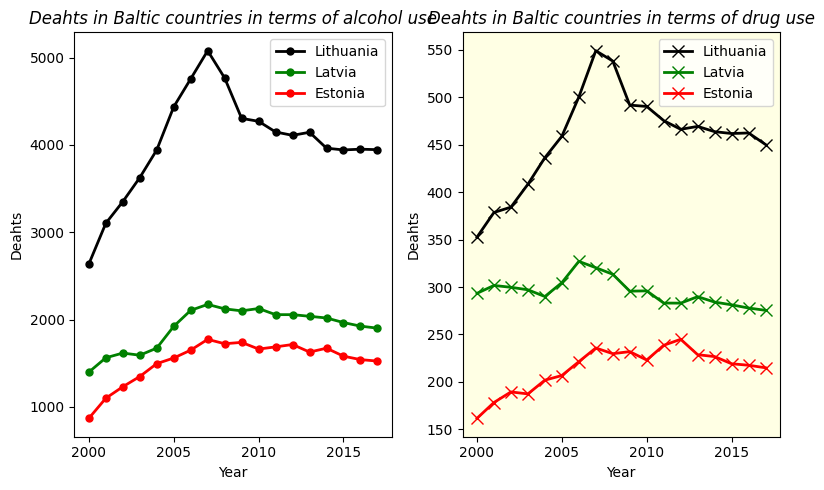

In [9]:
sql = '''
SELECT year, SUM(`Alcohol use`), SUM(`Drug use`)
FROM deaths d
JOIN continents c
	ON c.country = d.entity
WHERE country = '{}' AND year >= 2000
GROUP BY country, year
ORDER BY country ASC, year ASC;
'''
baltics = ['Lithuania', 'Latvia', 'Estonia']
colors = ['black', 'green', 'red']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,5))

for el in baltics:
    c.execute(sql.format(el))
    ans = c.fetchall()

    year = []
    alco = []
    drug = []
    for eil in ans:
        year.append(eil[0])
        alco.append(eil[1])
        drug.append(eil[2])

    ax1.plot(year, alco, lw=2, marker='o', ms=5, color=colors[baltics.index(el)])
    ax2.plot(year, drug, lw=2, marker='x', ms=8, color=colors[baltics.index(el)])

ax1.set_xlabel('Year')
ax1.set_ylabel('Deahts')
ax1.set_title('Deahts in Baltic countries in terms of alcohol use', style='italic')
ax1.legend(baltics)

ax2.set_xlabel('Year')
ax2.set_ylabel('Deahts')
ax2.set_title('Deahts in Baltic countries in terms of drug use', style='italic')
ax2.legend(baltics)
ax2.set_facecolor('#ffffe4')

plt.tight_layout()
plt.show()

4. How are the continents divided in terms of deaths from smoking (average death rates in period 1990-2017)?

In [10]:
sql = '''
SELECT continent, AVG(death_rate) AS `death rate` FROM
	(SELECT continent, d.year, SUM(smoking)/SUM(value) as death_rate
	FROM deaths d
	JOIN population p
		ON d.entity = p.country AND d.year = p.year
	JOIN continents c
		ON c.country = d.entity
	GROUP BY continent, d.year) d
GROUP BY continent
ORDER BY `death rate`;
'''
smo = pd.read_sql_query(sql, con=DB)
smo

/var/folders/yn/45njjrnx3ds24ycd9v72j0w00000gn/T/ipykernel_40437/1980130863.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  smo = pd.read_sql_query(sql, con=DB)


,continent,death rate
0,Africa,0.000301
1,South America,0.000779
2,Asia,0.001001
3,Oceania,0.001116
4,North America,0.001226
5,Europe,0.001942


Text(0.5, 1.0, 'Average death rate in terms of smoking\nby continents in period 1990-2017')

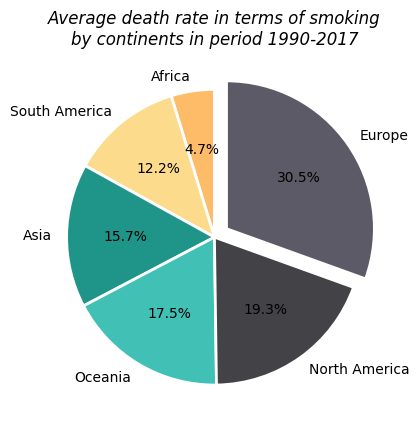

In [11]:
colors = ['#febc68', '#fcdb8c', '#1f9589', '#41c0b5', '#434247', '#5c5a66']

fig, ax = plt.subplots()
ax.pie(
    smo['death rate'],
    labels = smo['continent'],
    autopct = '%.1f%%',
    startangle = 90,
    explode = [0,0,0,0,0,0.1],
    wedgeprops = {'linewidth': 2.0, 'edgecolor': 'white'},
    colors = colors
    )
ax.set_title('Average death rate in terms of smoking\nby continents in period 1990-2017', style='italic')

5. Which countries are in the top 5 in terms of deaths from smoking per million inhabitants in each continent (average death rates in period 1990-2017)?

In [12]:
sql = '''
SELECT continent, country, AVG(death_rate)*1000000 AS `deaths` FROM
	(SELECT continent, c.country AS country, smoking/value AS death_rate
	FROM deaths d
	JOIN population p
		ON d.entity = p.country AND d.year = p.year
	JOIN continents c
		ON c.country = d.entity) d
GROUP BY continent, country
HAVING continent = '{}'
ORDER BY `deaths` DESC
LIMIT 5;
'''

/var/folders/yn/45njjrnx3ds24ycd9v72j0w00000gn/T/ipykernel_40437/4201804215.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  smo_cou = pd.read_sql_query(sql.format(smo.loc[con][0]), con=DB)
/var/folders/yn/45njjrnx3ds24ycd9v72j0w00000gn/T/ipykernel_40437/4201804215.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  smo_cou = pd.read_sql_query(sql.format(smo.loc[con][0]), con=DB)
/var/folders/yn/45njjrnx3ds24ycd9v72j0w00000gn/T/ipykernel_40437/4201804215.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  smo_cou = pd.re

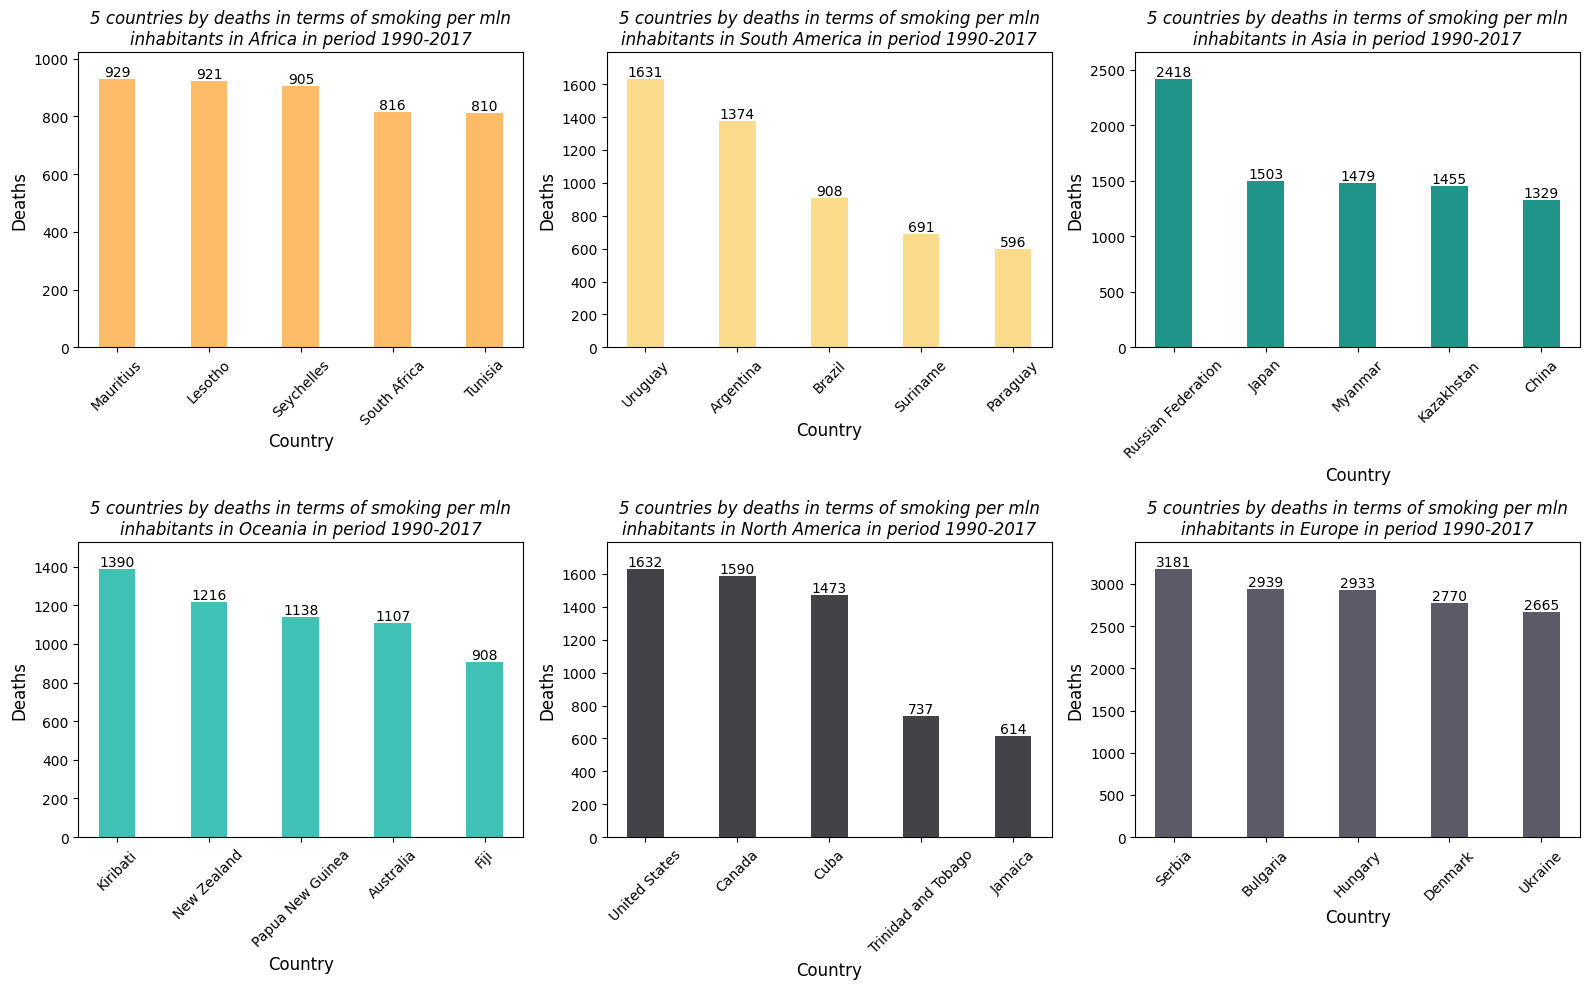

In [13]:
fig, ax = plt.subplots(2,3, figsize=(16,10))

xi = 0
yi = 0
for con in range(0,len(smo)):
    smo_cou = pd.read_sql_query(sql.format(smo.loc[con][0]), con=DB)
    A = ax[yi][xi].bar(smo_cou['country'], smo_cou['deaths'], color=colors[con], width=0.4)
    ax[yi][xi].set_xticks(smo_cou['country'])
    ax[yi][xi].set_xticklabels(smo_cou['country'], rotation=45)
    ax[yi][xi].set_title('5 countries by deaths in terms of smoking per mln\ninhabitants in '+smo.loc[con][0]+' in period 1990-2017', style='italic')
    ax[yi][xi].bar_label(A, fmt='%.0f')
    ax[yi][xi].set_xlabel('Country', fontsize=12)
    ax[yi][xi].set_ylabel('Deaths', fontsize=12)
    ax[yi][xi].set_ylim(0, smo_cou['deaths'].max()*1.1)
    xi = xi+1
    if xi == 3:
        xi = 0
        yi = yi+1

plt.tight_layout()
plt.show()

6. Which Asian countries (top 10) have the most deaths per million inhabitants in term of air pollution in 2017

/var/folders/yn/45njjrnx3ds24ycd9v72j0w00000gn/T/ipykernel_40437/3293111044.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  air = pd.read_sql_query(sql, con=DB)


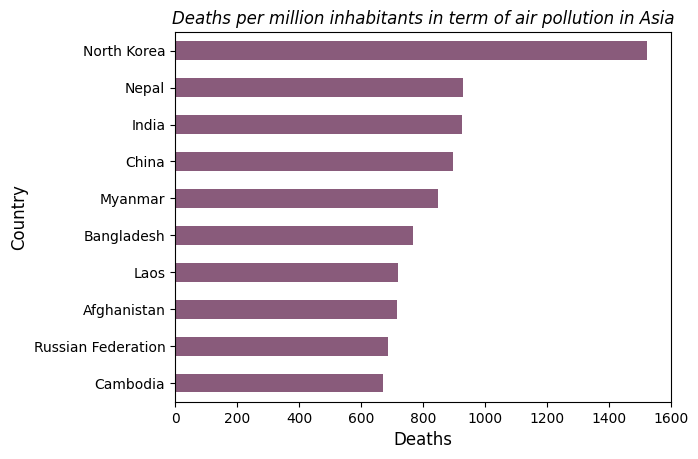

In [14]:
sql = '''
SELECT c.country, `Air pollution`/value*1000000 AS `death rate`
FROM deaths d
JOIN continents c
	ON d.entity = c.country
JOIN population p
	ON d.entity = p.country AND d.year = p.year
WHERE continent = 'Asia' AND d.year = 2017
ORDER BY `death rate` DESC
LIMIT 10;
'''
air = pd.read_sql_query(sql, con=DB)

fig, ax1 = plt.subplots()
air.plot(kind='barh', x='country', y='death rate', ax=ax1, color='xkcd:dusky purple', legend=None)
ax1.set_xlabel('Deaths', fontsize=12)
ax1.set_ylabel('Country', fontsize=12)
ax1.invert_yaxis()
plt.title('Deaths per million inhabitants in term of air pollution in Asia', style='italic')
plt.show()

In [15]:
DB.close()